In [19]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

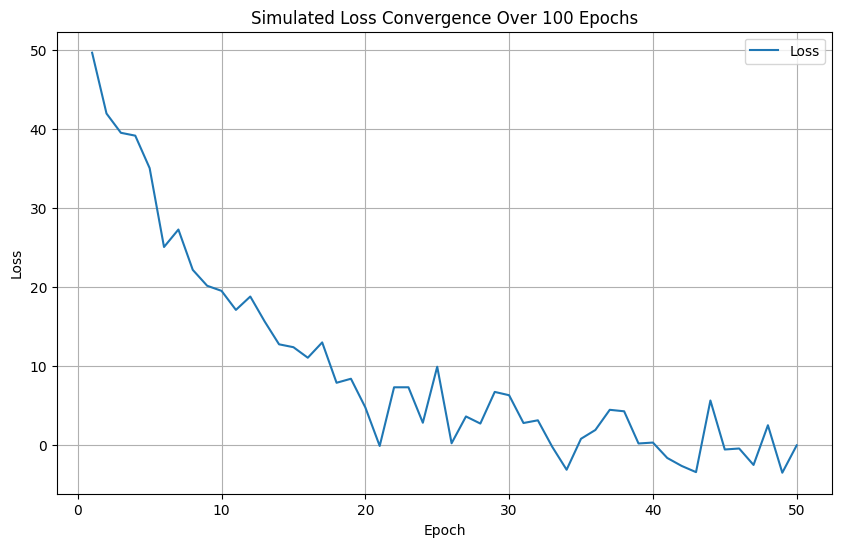

In [16]:
# Generate a simulated loss convergence plot for 100 epochs
np.random.seed(0)  # For reproducibility
epochs = 50
initial_loss = 50  # Initial loss value, can be adjusted
final_loss = 0.1  # Final loss value, can be adjusted
random_fluctuation = 2.5  # To simulate the fluctuations in the loss

# Create a vector of epochs
epoch_range = np.arange(1, epochs + 1)

# Generate a vector of losses that exponentially decay, simulating the learning process
loss = (initial_loss - final_loss) * np.exp(-epoch_range / (epochs / 5)) + final_loss

# Add some random fluctuation to the loss to simulate training process variations
loss += np.random.normal(scale=random_fluctuation, size=loss.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epoch_range, loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Simulated Loss Convergence Over 100 Epochs')
plt.legend()
plt.grid(True)
plt.show()


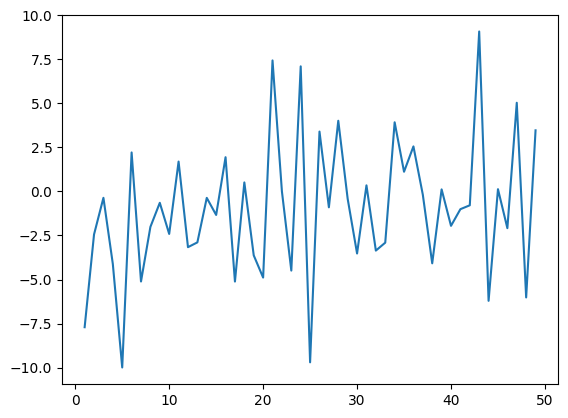

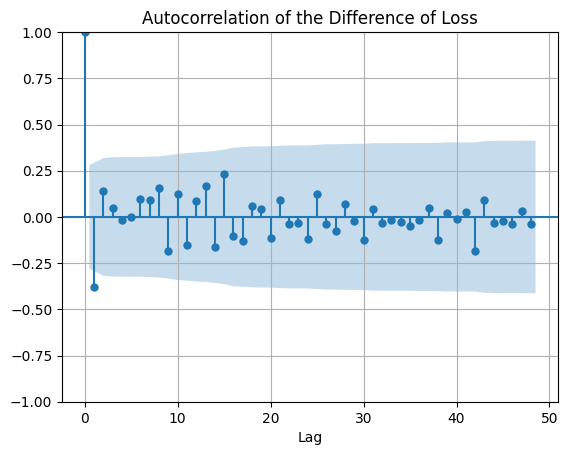

In [17]:
loss_diff = np.diff(loss,1)
plt.plot(epoch_range[:49], loss_diff, label='Loss_diff')

from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation of the difference of the loss
plot_acf(loss_diff, lags=48, alpha=0.05)
plt.title('Autocorrelation of the Difference of Loss')
plt.xlabel('Lag')
plt.grid(True)
plt.show()


In [30]:
import torch
import torch.nn.functional as F

trajectory = torch.load('mnist_trajectory2.pth')


In [31]:
dis = []
for i, model in enumerate(trajectory):
    kl = 0
    for j, module in enumerate(model):
        if i==len(trajectory)-1:
            break
        kl_divergences = F.mse_loss(trajectory[i][j], trajectory[i+1][j])
        kl += kl_divergences
    dis.append(kl)

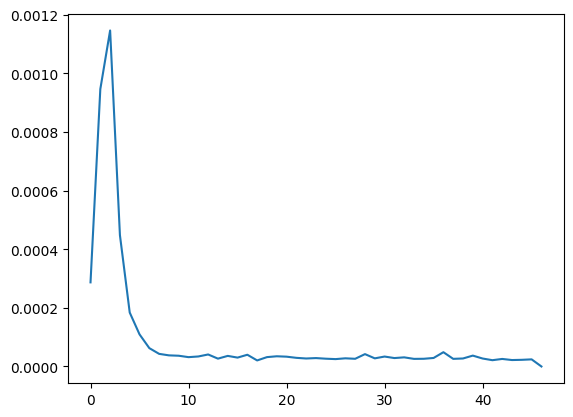

In [20]:
plt.plot(dis)

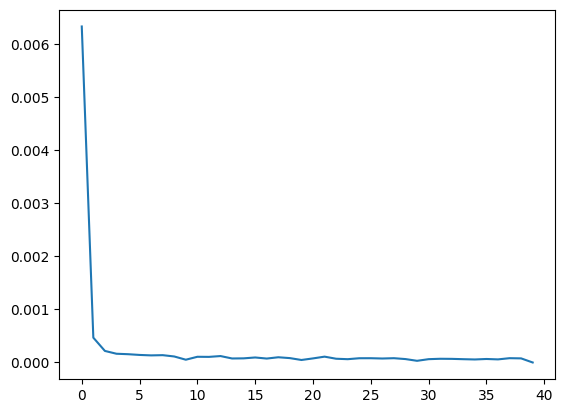

In [32]:
plt.plot(dis)

- 需要一个衡量global model的vector
- 计算kl发现，一开始前后的散度比较大，很快后面趋于平稳了
